# Olist ecommerce Project

### Collaborators
1. Victor Gonzalez
2. Roberto Perez
3. Raul Alonzo

This notebook is the load of data of the Olist Data Set which can be found on Kaggle for reference purposes. 

Link to Olist Original Data Set [Olist Data Set](https://www.kaggle.com/olistbr/brazilian-ecommerce).

You can run each cell by pressing shift enter or run all to get the final transformed data.


Link to Olist named dataset to use with this notebook [Data set](https://drive.google.com/open?id=1DjpUVsgzaCWZp6x1pwM73WkpaTgkSvaD)

##### May 16th 2020

## What this notebook does (not in order of execution)
1. Load of olist transformed datat set
2. Create summary table
3. Grouping of data frames by state and by categories
4. Grouping of data frames by category for Sao Paulo
5. Display Pies and Boxplot to see top ten results
6. Create DataFrame to get top ten sellers
7. Display Gmaps by latitude and longitude of Top Ten States by revenue
8. Display Gmaps by latiude and longitude of Top Ten Categories in Sao Paulo

In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import gmaps
from api_keys import g_key


In [2]:
#File to load

file_to_load = "Resources/olist_data.csv"

In [3]:
#Read file and store into Pandas data frame
olist_data=pd.read_csv(file_to_load)

/Users/Gugunner-Oryx-Pro/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Print Header to see correct loading of csv
olist_data.head()

,Unnamed: 0,order_id,order_item_id,product_id,seller_id,Total_order_values,Total_freight_values,Total_Revenue_by_order,zip_code_prefix,seller_city,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,repetido,product_category_name_english
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,15.1599,27277,volta redonda,-22.498183,-44.123614,volta redonda,RJ,False,cool_stuff
1,1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,15.5106,27277,volta redonda,-22.498183,-44.123614,volta redonda,RJ,False,cool_stuff
2,2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,17.4783,27277,volta redonda,-22.498183,-44.123614,volta redonda,RJ,False,cool_stuff
3,3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,15.7647,27277,volta redonda,-22.498183,-44.123614,volta redonda,RJ,False,cool_stuff
4,4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,15.1599,27277,volta redonda,-22.498183,-44.123614,volta redonda,RJ,False,cool_stuff


In [5]:
olist_data.shape

(111023, 16)

### Performed some basic operations

In [6]:
#Seller count Operation
Sellers_count = olist_data["seller_id"].unique()
len (Sellers_count)

3033

In [7]:
#Total Revenue Operation
Total_Revenue = round(olist_data["Total_Revenue_by_order"].sum(),2)
Total_Revenue

3742574.05

In [8]:
#Max Revenue Operation
Max_Revenue = round(olist_data["Total_Revenue_by_order"].max(),2)
Max_Revenue

2869.46

In [9]:
#Min Revenue Operation
Min_Revenue = round(olist_data["Total_Revenue_by_order"].min(),2)
Min_Revenue

1.28

In [10]:
#Average Revenue Operation
Average_Revenue = round(olist_data["Total_Revenue_by_order"].mean(),2)
Average_Revenue

33.71

In [11]:
#Category number Operation
Category_count = olist_data["product_category_name_english"].unique()
len (Category_count)


71

In [12]:
#Order Count Operation
Order_count = olist_data["order_id"].unique()
len (Order_count)

97256

In [13]:
#Number of Products Operation
Product_count = olist_data["product_id"].unique()
len(Product_count)

32328

In [14]:
#Average Items by order Operation
Average_items_by_order = round(olist_data["order_item_id"].mean(),2)
Average_items_by_order

1.2

## Summary Data Table

In [15]:
#Create summary Datat Frame
Summary_df= pd.DataFrame({"Number of Sellers": [len (Sellers_count)],
                         "Number of Categories":[len (Category_count)],
                         "Total Unique Products":[len (Product_count)],
                         "Total Orders":[len (Order_count)],
                         "Average Items by Order":[Average_items_by_order],
                         "Total Revenue":[Total_Revenue],
                         "Average Revenue per Order":[Average_Revenue],
                         "Max Revenue per Order":[Max_Revenue],
                         "Min Revenue per Order":[Min_Revenue]
                         })
#Formatting
Summary_df["Number of Sellers"] = Summary_df["Number of Sellers"].map(" {:,.0f}".format)
Summary_df["Total Unique Products"] = Summary_df["Total Unique Products"].map(" {:,.0f}".format)
Summary_df["Total Orders"] = Summary_df["Total Orders"].map(" {:,.0f}".format)
Summary_df["Total Revenue"] = Summary_df["Total Revenue"].map("$ {:,.0f}".format)
Summary_df["Average Revenue per Order"] = Summary_df["Average Revenue per Order"].map("$ {:,.1f}".format)
Summary_df["Max Revenue per Order"] = Summary_df["Max Revenue per Order"].map("$ {:,.1f}".format)
Summary_df["Min Revenue per Order"] = Summary_df["Min Revenue per Order"].map("$ {:,.1f}".format)
Summary_df

,Number of Sellers,Number of Categories,Total Unique Products,Total Orders,Average Items by Order,Total Revenue,Average Revenue per Order,Max Revenue per Order,Min Revenue per Order
0,"3,033",71,"32,328","97,256",1.2,"$ 3,742,574",$ 33.7,"$ 2,869.5",$ 1.3


## Revenue by Product Category

In [16]:
#Display Data Frame of Revenue by product Category 
categories_group = olist_data.groupby("product_category_name_english").agg({
    "Total_Revenue_by_order":["sum","count","min","max","mean"]  
})
categories_group.columns=categories_group.columns.droplevel(0)
categories_group.columns = ['Total Revenue', 'Total Orders', 'Min Revenue', 'Max Revenue', 'Mean Revenue']
categories_group

,Total Revenue,Total Orders,Min Revenue,Max Revenue,Mean Revenue
product_category_name_english,,,,,
agro_industry_and_commerce,20733.3315,212,4.2819,1277.1234,97.798733
air_conditioning,16063.6539,297,5.4600,344.9334,54.086377
art,6272.5320,209,2.5662,1412.5986,30.012115
arts_and_craftmanship,475.9797,24,4.9308,66.0072,19.832487
audio,12175.0902,364,4.6809,133.7658,33.448050
...,...,...,...,...,...
stationery,62317.3887,2517,2.1147,367.3068,24.758597
tablets_printing_image,1968.8739,83,6.3000,191.6859,23.721372
telephony,92379.1659,4545,2.6019,516.0624,20.325449


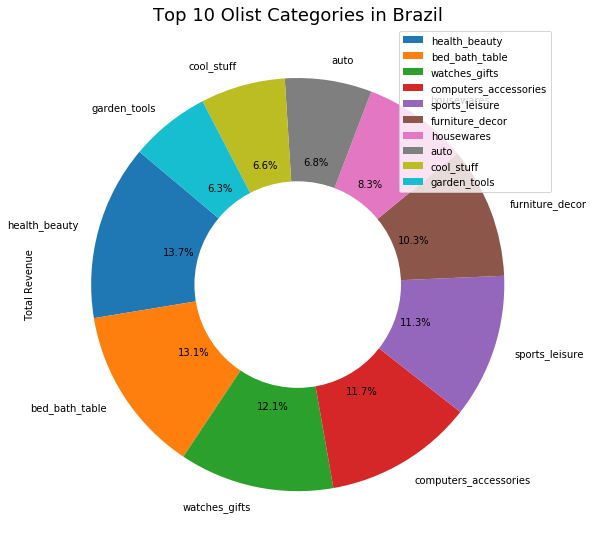

In [17]:
#Display Pie Graph of Top 10 Revenue by Category
categories_group.sort_values(by="Total Revenue",ascending=False).iloc[0:10].plot.pie(y="Total Revenue",figsize=(9.5, 9.5),startangle=140,autopct="%1.1f%%", labeldistance=1.1)
plt.title('Top 10 Olist Categories in Brazil', fontsize=18)
donut = plt.Circle(xy=(0,0), radius=0.5, facecolor='white')
plt.gca().add_artist(donut)
plt.show()

In [18]:
categories_df = categories_group.sort_values(by='Total Revenue',ascending = False)

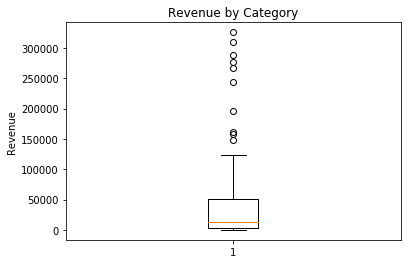

In [19]:
#Display Boxplot to place average Revenue by category and visualize outlayers
fig1, ax1 = plt.subplots()
ax1.boxplot([categories_df["Total Revenue"]])
ax1.set_title('Revenue by Category')
ax1.set_ylabel('Revenue')
plt.show()

## Revenue by State

In [20]:
#Display Data Frame of Revenue by State
state_group = olist_data.groupby("geolocation_state").agg({
    "Total_Revenue_by_order":["sum","count","min","max","mean"],
    "geolocation_lat":"first",
    "geolocation_lng":"first"   
})

state_group.columns=state_group.columns.droplevel(0)
state_group.columns=["Total Revenue","Total Orders","Min Revenue","Max Revenue","Mean Revenue","Geo Lat","Geo Lng"]
state_group

,Total Revenue,Total Orders,Min Revenue,Max Revenue,Mean Revenue,Geo Lat,Geo Lng
geolocation_state,,,,,,,
AC,6.296640e+01,1,62.9664,62.9664,62.966400,-9.974562,-67.809656
AM,2.643480e+02,3,28.4025,206.6946,88.116000,-3.135623,-60.023469
BA,7.088033e+04,647,5.6238,983.1738,109.552290,-12.981587,-38.455265
CE,5.264322e+03,94,5.5188,151.1916,56.003426,-3.890115,-38.447731
DF,2.431282e+04,848,4.4100,237.6633,28.670775,-15.840667,-48.051943
ES,1.433231e+04,366,5.0610,344.9334,39.159325,-20.954686,-41.350822
GO,1.832754e+04,510,5.0190,1412.5986,35.936353,-16.770154,-49.340042
MA,1.055800e+04,405,11.9994,79.5816,26.069130,-2.546079,-44.308986
MG,2.936743e+05,8740,1.5288,784.6062,33.601181,-19.916247,-43.936234


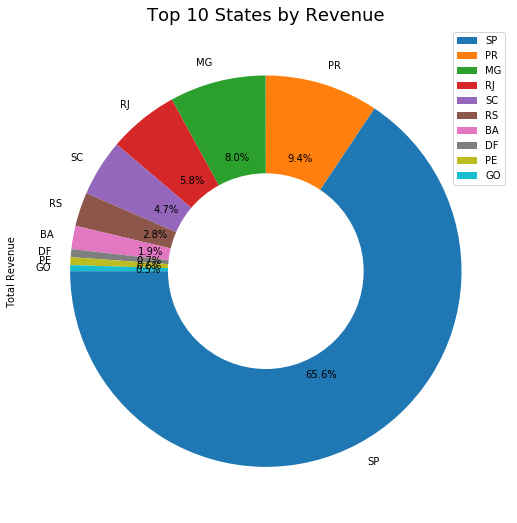

In [21]:
#Display Pie Graph of Top 10 Revenue by State
state_group.sort_values(by="Total Revenue",ascending=False).iloc[0:10].plot.pie(y="Total Revenue",figsize=(9,9),startangle=180,autopct="%1.1f%%", labeldistance=1.1)
state_group=state_group.reset_index()
state_group = state_group.rename(columns={
    "geolocation_state": "State"
})
states_df = state_group.sort_values(by="Total Revenue",ascending=False)
plt.title('Top 10 States by Revenue', fontsize=18)
donut = plt.Circle(xy=(0,0), radius=0.5, facecolor='white')
plt.gca().add_artist(donut)
plt.show()

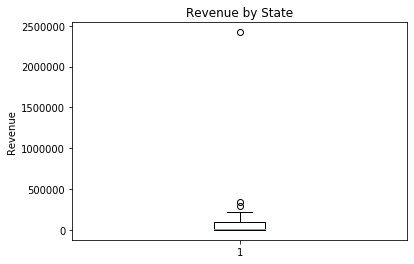

In [22]:
#Display Boxplot to place average Revenue by State and visualize outlayers
fig1, ax1 = plt.subplots()
plt.boxplot([states_df["Total Revenue"]])
ax1.set_title('Revenue by State')
ax1.set_ylabel('Revenue')
plt.show()

## Sao Paulo Revenue

In [23]:
#Segmentation of Olist Data by Geolocation State for Sao Paulo
sao_paulo_df=olist_data.query("geolocation_state=='SP'")

sao_paulo_df

,Unnamed: 0,order_id,order_item_id,product_id,seller_id,Total_order_values,Total_freight_values,Total_Revenue_by_order,zip_code_prefix,seller_city,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,repetido,product_category_name_english
127,127,76263f760191f470b92de7f5ff14053a,1,708cf9598cc7a8ed22f6f060d3ab547c,a416b6a846a11724393025641d4edd5e,386.4,18.95,85.1235,3702,sao paulo,-23.516747,-46.548182,sao paulo,SP,False,cool_stuff
128,128,803b1bae34b452deca8621b507e483f4,1,7f253218cda162fcc215fd4e0768b00c,a416b6a846a11724393025641d4edd5e,369.0,13.79,80.3859,3702,sao paulo,-23.516747,-46.548182,sao paulo,SP,False,cool_stuff
129,129,a761862f0091efb27d04d58ad23de019,1,e7bc716e2ba2575a2f572b7a4bd281d6,a416b6a846a11724393025641d4edd5e,369.0,18.83,81.4443,3702,sao paulo,-23.516747,-46.548182,sao paulo,SP,False,cool_stuff
130,130,d6f2337b7df53866592eb81ac57cdf74,1,8096dd79187d317b844454d6e6d9039a,a416b6a846a11724393025641d4edd5e,829.0,14.62,177.1602,3702,sao paulo,-23.516747,-46.548182,sao paulo,SP,False,cool_stuff
131,131,4019dc88e273c81a8e284257bb938f42,1,a5bc15d5136b84537fb92bb7c06f6837,4a3ca9315b744ce9f8e9374361493884,169.0,21.67,40.0407,14940,ibitinga,-21.766477,-48.831547,ibitinga,SP,False,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111017,111017,31a2886d02ad2127bfec204da2e93b66,1,3a96bcbf644a5d390107570628568026,70126eecc6aa1274392a1743866e9678,19.8,7.40,5.7120,6449,barueri,-23.542750,-46.866258,barueri,SP,False,arts_and_craftmanship
111018,111018,2c12150c742ae2fa48bc703964c16c5f,1,2b54fb9a4acf707537eb53eb2458c241,ef728fa1f17436c91ed1ccd03dcf9631,57.9,19.60,16.2750,17201,jau,-22.293284,-48.565582,jau,SP,False,arts_and_craftmanship
111019,111019,2ef4a11b6e24fdfbb43b92cb5f95edff,1,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,19.0,12.86,6.6906,17201,jau,-22.293284,-48.565582,jau,SP,False,arts_and_craftmanship
111020,111020,2ef4a11b6e24fdfbb43b92cb5f95edff,2,eacb104882d39ffb53140b1d1860a7c3,ef728fa1f17436c91ed1ccd03dcf9631,79.8,25.74,22.1634,17201,jau,-22.293284,-48.565582,jau,SP,False,arts_and_craftmanship


In [24]:
#Display Data Frame of Sao Paulo Revenue
SP_group = sao_paulo_df.groupby("product_category_name_english").agg({
    "Total_Revenue_by_order":["sum","count","min","max","mean"],
    "geolocation_lat":"first",
    "geolocation_lng":"first"   
})

SP_group.columns=SP_group.columns.droplevel(0)
SP_group.columns=["Total Revenue","Total Orders","Min Revenue","Max Revenue","Mean Revenue","Geo Lat","Geo Lng"]
SP_group

,Total Revenue,Total Orders,Min Revenue,Max Revenue,Mean Revenue,Geo Lat,Geo Lng
product_category_name_english,,,,,,,
agro_industry_and_commerce,6809.6070,99,4.2819,668.7555,68.783909,-23.572821,-46.523296
air_conditioning,7983.7380,165,5.4600,344.0535,48.386291,-23.537511,-46.637057
art,3732.6450,161,2.5662,69.6822,23.184130,-23.693986,-46.701883
arts_and_craftmanship,326.0292,20,4.9308,31.8570,16.301460,-23.468441,-46.720688
audio,11617.9938,344,4.6809,133.7658,33.773238,-23.539495,-46.632844
...,...,...,...,...,...,...,...
stationery,47111.4273,1943,2.1147,367.3068,24.246746,-20.548228,-47.395897
tablets_printing_image,1777.1880,82,6.3000,48.4638,21.673024,-23.934659,-46.331065
telephony,57481.5444,3913,2.6019,516.0624,14.689891,-23.539495,-46.632844


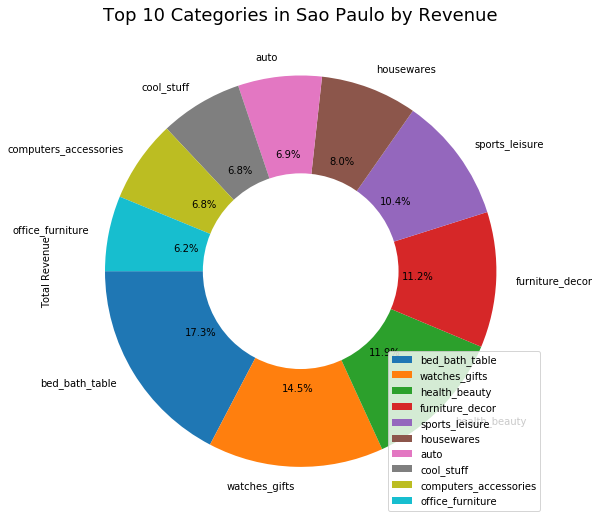

In [25]:
#Display Pie Graph of Top 10 Category Products in Sao paulo

SP_group.sort_values(by="Total Revenue",ascending=False).iloc[0:10].plot.pie(y="Total Revenue",figsize=(9,9),startangle=180,autopct="%1.1f%%")
plt.title('Top 10 Categories in Sao Paulo by Revenue', fontsize=18)
donut = plt.Circle(xy=(0,0), radius=0.5, facecolor='white')
plt.gca().add_artist(donut)
plt.show()
SP_group = SP_group.sort_values(by="Total Revenue",ascending=False)




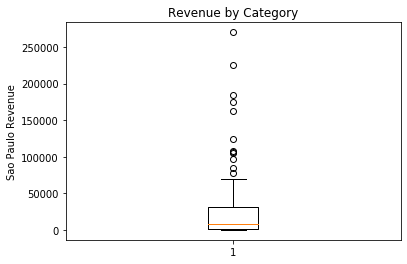

In [26]:
#Display Boxplot to place average Revenue by Category and visualize outlayers
fig1, ax1 = plt.subplots()
plt.boxplot([SP_group["Total Revenue"]])
ax1.set_title('Revenue by Category')
ax1.set_ylabel('Sao Paulo Revenue')
plt.show()

In [27]:
# Create a top ten dataframe of categories in Sao Paulo and clean same lat and lng
Top_10_Cat_SP = SP_group.iloc[0:10]
#Top_10_Cat_SP["Total Revenue"] = Top_10_Cat_SP["Total Revenue"].map("$ {:,.2f}".format)
Top_10_Cat_SP["Min Revenue"] = Top_10_Cat_SP["Min Revenue"].map("$ {:,.2f}".format)
Top_10_Cat_SP["Max Revenue"] = Top_10_Cat_SP["Max Revenue"].map("$ {:,.2f}".format)
Top_10_Cat_SP["Mean Revenue"] = Top_10_Cat_SP["Mean Revenue"].map("$ {:,.2f}".format)
Top_10_Cat_SP = Top_10_Cat_SP.assign(repeat = lambda x: x["Geo Lat"].duplicated())
Top_10_Cat_SP = Top_10_Cat_SP.query('repeat==False')
Top_10_Cat_SP

/Users/Gugunner-Oryx-Pro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/Gugunner-Oryx-Pro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/Gugunner-Oryx-Pro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,Total Revenue,Total Orders,Min Revenue,Max Revenue,Mean Revenue,Geo Lat,Geo Lng,repeat
product_category_name_english,,,,,,,,
bed_bath_table,270296.3550,9748,$ 3.34,$ 479.12,$ 27.73,-21.189402,-47.792956,False
watches_gifts,226094.4903,4825,$ 5.10,$ 843.55,$ 46.86,-23.651115,-46.755211,False
health_beauty,184848.7725,6389,$ 1.91,$ 692.45,$ 28.93,-23.539495,-46.632844,False
housewares,124385.2743,4873,$ 1.28,"$ 1,455.16",$ 25.53,-20.548228,-47.395897,False
auto,107848.8726,3326,$ 2.22,$ 475.19,$ 32.43,-23.623582,-46.610560,False
cool_stuff,106516.0782,2617,$ 2.79,"$ 1,009.98",$ 40.70,-23.516747,-46.548182,False
office_furniture,96895.9152,1618,$ 10.23,$ 592.49,$ 59.89,-23.482623,-46.374490,False


In [28]:
# Create Heatmap and markers to display top ten categories by location 
gmaps.configure(api_key=g_key)
layout={
    "width":"800px",
    "height":"600px",
    "border":"1px solid black",
    "padding":"5px",
    "margin":"0 auto"
    
}
max_cat_lat=list(Top_10_Cat_SP["Geo Lat"])[0]
max_cat_lng=list(Top_10_Cat_SP["Geo Lng"])[0]
gmaps_fig=gmaps.figure(
    map_type="TERRAIN",
    center=(max_cat_lat,max_cat_lng),
zoom_level=8,layout=layout)
locations= Top_10_Cat_SP[["Geo Lat","Geo Lng"]]
markers=gmaps.marker_layer(locations)
heat_layer=gmaps.heatmap_layer(
    locations,
    weights=Top_10_Cat_SP["Total Revenue"],
    dissipating=True,
    max_intensity=100,
    point_radius=10,
)
Top_10_Cat_SP["Total Revenue"] = Top_10_Cat_SP["Total Revenue"].map("$ {:,.2f}".format)
template="""

<dl>


<dt>Total Revenue</dt><dd>{Total Revenue} USD </dd>
<dt>Mean Revenue</dt><dd>{Mean Revenue} USD </dd>
<dt>Category</dt><dd>{product_category_name_english}</dd>
</dl>
"""
template_info=[template.format(**row) for index, row in Top_10_Cat_SP.reset_index().iterrows() ]
marker_layer=gmaps.marker_layer(locations,info_box_content=template_info,display_info_box=True)
gmaps_fig.add_layer(markers)
gmaps_fig.add_layer(marker_layer)
gmaps_fig.add_layer(heat_layer)
gmaps_fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto', padding='5px', width='80…

In [29]:
# Create Sellers Top Ten in Sao Paulo
Sellers_group = olist_data.groupby(['seller_id','product_category_name_english','geolocation_state'])["Total_Revenue_by_order"].sum()
Sellers_group_df=pd.DataFrame(Sellers_group)
Sellers_group_df=Sellers_group_df.sort_values(["Total_Revenue_by_order"], ascending=False).iloc[0:10]
Sellers_group_df["Total_Revenue_by_order"] = Sellers_group_df["Total_Revenue_by_order"].map("$ {:,.1f}".format)
Sellers_group_df

,,,Total_Revenue_by_order
seller_id,product_category_name_english,geolocation_state,
7c67e1448b00f6e969d365cea6b010ab,office_furniture,SP,"$ 72,963.5"
4869f7a5dfa277a7dca6462dcf3b52b2,watches_gifts,SP,"$ 47,199.4"
4a3ca9315b744ce9f8e9374361493884,bed_bath_table,SP,"$ 45,742.5"
da8622b14eb17ae2831f4ac5b9dab84a,bed_bath_table,SP,"$ 45,298.9"
1025f0e2d44d7041d6cf58b6550e0bfa,furniture_decor,SP,"$ 43,132.0"
fa1c13f2614d7b5c4749cbc52fecda94,watches_gifts,SP,"$ 42,786.2"
1f50f920176fa81dab994f9023523100,garden_tools,SP,"$ 42,152.6"
53243585a1d6dc2643021fd1853d8905,computers,BA,"$ 38,001.6"
7e93a43ef30c4f03f38b393420bc753a,watches_gifts,SP,"$ 37,217.5"


In [30]:
# Create a top ten dataframe of states in Brazil
Top_10_States = states_df.iloc[0:10]
Top_10_States["Total Revenue"] = Top_10_States["Total Revenue"].map("$ {:,.2f}".format)
Top_10_States["Min Revenue"] = Top_10_States["Min Revenue"].map("$ {:,.2f}".format)
Top_10_States["Max Revenue"] = Top_10_States["Max Revenue"].map("$ {:,.2f}".format)
Top_10_States["Mean Revenue"] = Top_10_States["Mean Revenue"].map("$ {:,.2f}".format)
Top_10_States

/Users/Gugunner-Oryx-Pro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Gugunner-Oryx-Pro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/Gugunner-Oryx-Pro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A v

,State,Total Revenue,Total Orders,Min Revenue,Max Revenue,Mean Revenue,Geo Lat,Geo Lng
21,SP,"$ 2,421,413.73",78396,$ 1.28,"$ 2,869.46",$ 30.89,-23.516747,-46.548182
14,PR,"$ 345,853.94",8717,$ 2.44,"$ 1,453.66",$ 39.68,-24.940999,-53.493187
8,MG,"$ 293,674.33",8740,$ 1.53,$ 784.61,$ 33.60,-19.916247,-43.936234
15,RJ,"$ 214,203.30",4891,$ 2.99,$ 947.80,$ 43.80,-22.498183,-44.123614
19,SC,"$ 172,934.12",4231,$ 4.03,$ 715.36,$ 40.87,-26.468503,-49.109883
18,RS,"$ 103,291.27",2154,$ 4.09,"$ 1,277.12",$ 47.95,-29.670349,-51.461468
2,BA,"$ 70,880.33",647,$ 5.62,$ 983.17,$ 109.55,-12.981587,-38.455265
4,DF,"$ 24,312.82",848,$ 4.41,$ 237.66,$ 28.67,-15.840667,-48.051943
12,PE,"$ 23,969.20",448,$ 3.90,$ 487.69,$ 53.50,-8.138173,-34.932226
6,GO,"$ 18,327.54",510,$ 5.02,"$ 1,412.60",$ 35.94,-16.770154,-49.340042


In [31]:
# Create a gmap with markers for the top ten states with most revenue
gmaps.configure(api_key=g_key)
layout={
    "width":"800px",
    "height":"600px",
    "border":"1px solid black",
    "padding":"5px",
    "margin":"0 auto"
    
}
max_seller_lat=list(Top_10_States["Geo Lat"])[0]
max_seller_lng=list(Top_10_States["Geo Lng"])[0]
gmaps_fig=gmaps.figure(
    center=(max_seller_lat,max_seller_lng),
zoom_level=3,layout=layout)
locations= Top_10_States[["Geo Lat","Geo Lng"]]
markers=gmaps.marker_layer(locations)
states=list(Top_10_States["State"])
template="""
<dl>

<dt>State</dt><dd>{State}</dd>
<dt>Total Revenue</dt><dd>{Total Revenue} USD </dd>
<dt>Mean Revenue</dt><dd>{Mean Revenue} USD </dd>
</dl>
"""
template_info=[template.format(**row) for index, row in Top_10_States.iterrows() ]
marker_layer=gmaps.marker_layer(locations,info_box_content=template_info,hover_text=states,display_info_box=True)
gmaps_fig.add_layer(markers)
gmaps_fig.add_layer(marker_layer)
gmaps_fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto', padding='5px', width='80…